In [2]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

2023-08-24 19:39:03.941235: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-24 19:39:03.979977: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 19:39:04.610153: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Notebook run using keras: 2.13.1


In [3]:
inet_model = inc_net.InceptionV3()

2023-08-24 19:39:05.644007: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

1/1 [==============================] - 1s 1s/step
('n02133161', 'American_black_bear', 0.637279)
('n02105056', 'groenendael', 0.031802833)
('n02104365', 'schipperke', 0.029921424)
('n01883070', 'wombat', 0.028507374)
('n01877812', 'wallaby', 0.025098754)


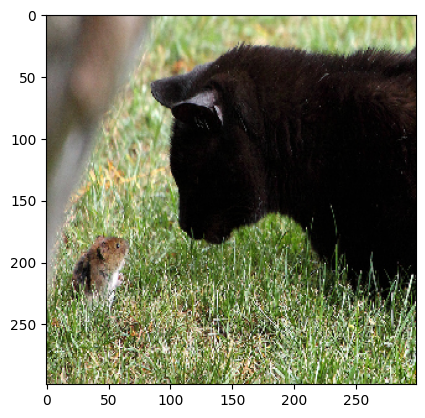

In [5]:
images = transform_img_fn([os.path.join('data','cat_mouse.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [6]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

/home/dhshin/anaconda3/envs/lime/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
explainer = lime_image.LimeImageExplainer()

In [8]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|                                                                                   | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 193ms/step


  1%|▋                                                                         | 10/1000 [00:00<00:29, 33.72it/s]

1/1 [==============================] - 0s 114ms/step


  2%|█▍                                                                        | 20/1000 [00:00<00:24, 40.34it/s]

1/1 [==============================] - 0s 111ms/step


  3%|██▏                                                                       | 30/1000 [00:00<00:21, 44.62it/s]

1/1 [==============================] - 0s 108ms/step


  4%|██▉                                                                       | 40/1000 [00:00<00:20, 47.12it/s]

1/1 [==============================] - 0s 112ms/step


  5%|███▋                                                                      | 50/1000 [00:01<00:19, 48.59it/s]

1/1 [==============================] - 0s 108ms/step


  6%|████▍                                                                     | 60/1000 [00:01<00:18, 49.75it/s]

1/1 [==============================] - 0s 133ms/step


  7%|█████▏                                                                    | 70/1000 [00:01<00:19, 48.57it/s]

1/1 [==============================] - 0s 134ms/step


  8%|█████▉                                                                    | 80/1000 [00:01<00:19, 47.41it/s]

1/1 [==============================] - 0s 190ms/step


  9%|██████▋                                                                   | 90/1000 [00:02<00:21, 43.12it/s]

1/1 [==============================] - 0s 132ms/step


 10%|███████▎                                                                 | 100/1000 [00:02<00:20, 43.77it/s]

1/1 [==============================] - 0s 124ms/step


 11%|████████                                                                 | 110/1000 [00:02<00:19, 44.79it/s]

1/1 [==============================] - 0s 112ms/step


 12%|████████▊                                                                | 120/1000 [00:02<00:19, 46.19it/s]

1/1 [==============================] - 0s 124ms/step


 13%|█████████▍                                                               | 130/1000 [00:02<00:18, 46.49it/s]

1/1 [==============================] - 0s 125ms/step


 14%|██████████▏                                                              | 140/1000 [00:03<00:18, 46.65it/s]

1/1 [==============================] - 0s 114ms/step


 15%|██████████▉                                                              | 150/1000 [00:03<00:17, 47.72it/s]

1/1 [==============================] - 0s 110ms/step


 16%|███████████▋                                                             | 160/1000 [00:03<00:17, 48.87it/s]

1/1 [==============================] - 0s 111ms/step


 17%|████████████▍                                                            | 170/1000 [00:03<00:16, 49.68it/s]

1/1 [==============================] - 0s 120ms/step


 18%|█████████████▏                                                           | 180/1000 [00:03<00:16, 49.47it/s]

1/1 [==============================] - 0s 115ms/step


 19%|█████████████▊                                                           | 190/1000 [00:04<00:16, 49.83it/s]

1/1 [==============================] - 0s 107ms/step


 20%|██████████████▌                                                          | 200/1000 [00:04<00:15, 50.11it/s]

1/1 [==============================] - 0s 112ms/step


 21%|███████████████▎                                                         | 210/1000 [00:04<00:15, 50.31it/s]

1/1 [==============================] - 0s 127ms/step


 22%|████████████████                                                         | 220/1000 [00:04<00:15, 49.28it/s]

1/1 [==============================] - 0s 107ms/step


 23%|████████████████▊                                                        | 230/1000 [00:04<00:15, 50.13it/s]

1/1 [==============================] - 0s 111ms/step


 24%|█████████████████▌                                                       | 240/1000 [00:05<00:15, 50.49it/s]

1/1 [==============================] - 0s 108ms/step


 25%|██████████████████▎                                                      | 250/1000 [00:05<00:14, 50.94it/s]

1/1 [==============================] - 0s 110ms/step


 26%|██████████████████▉                                                      | 260/1000 [00:05<00:14, 51.26it/s]

1/1 [==============================] - 0s 109ms/step


 27%|███████████████████▋                                                     | 270/1000 [00:05<00:14, 51.30it/s]

1/1 [==============================] - 0s 115ms/step


 28%|████████████████████▍                                                    | 280/1000 [00:05<00:14, 50.63it/s]

1/1 [==============================] - 0s 113ms/step


 29%|█████████████████████▏                                                   | 290/1000 [00:06<00:13, 50.79it/s]

1/1 [==============================] - 0s 110ms/step


 30%|█████████████████████▉                                                   | 300/1000 [00:06<00:13, 51.01it/s]

1/1 [==============================] - 0s 110ms/step


 31%|██████████████████████▋                                                  | 310/1000 [00:06<00:13, 51.36it/s]

1/1 [==============================] - 0s 110ms/step


 32%|███████████████████████▎                                                 | 320/1000 [00:06<00:13, 51.49it/s]

1/1 [==============================] - 0s 110ms/step


 33%|████████████████████████                                                 | 330/1000 [00:06<00:13, 51.43it/s]

1/1 [==============================] - 0s 109ms/step


 34%|████████████████████████▊                                                | 340/1000 [00:06<00:12, 51.41it/s]

1/1 [==============================] - 0s 107ms/step


 35%|█████████████████████████▌                                               | 350/1000 [00:07<00:12, 51.48it/s]

1/1 [==============================] - 0s 108ms/step


 36%|██████████████████████████▎                                              | 360/1000 [00:07<00:12, 51.00it/s]

1/1 [==============================] - 0s 110ms/step


 37%|███████████████████████████                                              | 370/1000 [00:07<00:12, 51.11it/s]

1/1 [==============================] - 0s 106ms/step


 38%|███████████████████████████▋                                             | 380/1000 [00:07<00:12, 51.40it/s]

1/1 [==============================] - 0s 111ms/step


 39%|████████████████████████████▍                                            | 390/1000 [00:07<00:11, 51.33it/s]

1/1 [==============================] - 0s 108ms/step


 40%|█████████████████████████████▏                                           | 400/1000 [00:08<00:11, 51.45it/s]

1/1 [==============================] - 0s 122ms/step


 41%|█████████████████████████████▉                                           | 410/1000 [00:08<00:11, 50.52it/s]

1/1 [==============================] - 0s 120ms/step


 42%|██████████████████████████████▋                                          | 420/1000 [00:08<00:11, 49.55it/s]

1/1 [==============================] - 0s 113ms/step


 43%|███████████████████████████████▍                                         | 430/1000 [00:08<00:11, 49.40it/s]

1/1 [==============================] - 0s 120ms/step


 44%|████████████████████████████████                                         | 440/1000 [00:08<00:11, 48.99it/s]

1/1 [==============================] - 0s 109ms/step


 45%|████████████████████████████████▊                                        | 450/1000 [00:09<00:11, 49.70it/s]

1/1 [==============================] - 0s 137ms/step


 46%|█████████████████████████████████▌                                       | 460/1000 [00:09<00:11, 48.03it/s]

1/1 [==============================] - 0s 121ms/step


 47%|██████████████████████████████████▎                                      | 470/1000 [00:09<00:11, 48.11it/s]

1/1 [==============================] - 0s 114ms/step


 48%|███████████████████████████████████                                      | 480/1000 [00:09<00:10, 48.82it/s]

1/1 [==============================] - 0s 133ms/step


 49%|███████████████████████████████████▊                                     | 490/1000 [00:10<00:10, 47.92it/s]

1/1 [==============================] - 0s 117ms/step


 50%|████████████████████████████████████▌                                    | 500/1000 [00:10<00:10, 48.39it/s]

1/1 [==============================] - 0s 127ms/step


 51%|█████████████████████████████████████▏                                   | 510/1000 [00:10<00:10, 47.80it/s]

1/1 [==============================] - 0s 122ms/step


 52%|█████████████████████████████████████▉                                   | 520/1000 [00:10<00:10, 47.60it/s]

1/1 [==============================] - 0s 109ms/step


 53%|██████████████████████████████████████▋                                  | 530/1000 [00:10<00:09, 48.61it/s]

1/1 [==============================] - 0s 123ms/step


 54%|███████████████████████████████████████▍                                 | 540/1000 [00:11<00:09, 48.42it/s]

1/1 [==============================] - 0s 106ms/step


 55%|████████████████████████████████████████▏                                | 550/1000 [00:11<00:09, 49.50it/s]

1/1 [==============================] - 0s 115ms/step


 56%|████████████████████████████████████████▉                                | 560/1000 [00:11<00:08, 49.52it/s]

1/1 [==============================] - 0s 108ms/step


 57%|█████████████████████████████████████████▌                               | 570/1000 [00:11<00:08, 50.17it/s]

1/1 [==============================] - 0s 108ms/step


 58%|██████████████████████████████████████████▎                              | 580/1000 [00:11<00:08, 50.15it/s]

1/1 [==============================] - 0s 112ms/step


 59%|███████████████████████████████████████████                              | 590/1000 [00:12<00:08, 50.26it/s]

1/1 [==============================] - 0s 118ms/step


 60%|███████████████████████████████████████████▊                             | 600/1000 [00:12<00:08, 49.79it/s]

1/1 [==============================] - 0s 121ms/step


 61%|████████████████████████████████████████████▌                            | 610/1000 [00:12<00:07, 49.34it/s]

1/1 [==============================] - 0s 109ms/step


 62%|█████████████████████████████████████████████▎                           | 620/1000 [00:12<00:07, 50.05it/s]

1/1 [==============================] - 0s 120ms/step


 63%|█████████████████████████████████████████████▉                           | 630/1000 [00:12<00:07, 49.40it/s]

1/1 [==============================] - 0s 110ms/step


 64%|██████████████████████████████████████████████▋                          | 640/1000 [00:13<00:07, 49.61it/s]

1/1 [==============================] - 0s 120ms/step


 65%|███████████████████████████████████████████████▍                         | 650/1000 [00:13<00:07, 48.74it/s]

1/1 [==============================] - 0s 110ms/step


 66%|████████████████████████████████████████████████▏                        | 660/1000 [00:13<00:06, 49.27it/s]

1/1 [==============================] - 0s 115ms/step


 67%|████████████████████████████████████████████████▉                        | 670/1000 [00:13<00:06, 49.35it/s]

1/1 [==============================] - 0s 114ms/step


 68%|█████████████████████████████████████████████████▋                       | 680/1000 [00:13<00:06, 49.22it/s]

1/1 [==============================] - 0s 141ms/step


 69%|██████████████████████████████████████████████████▎                      | 690/1000 [00:14<00:06, 47.62it/s]

1/1 [==============================] - 0s 120ms/step


 70%|███████████████████████████████████████████████████                      | 700/1000 [00:14<00:06, 47.92it/s]

1/1 [==============================] - 0s 125ms/step


 71%|███████████████████████████████████████████████████▊                     | 710/1000 [00:14<00:06, 47.90it/s]

1/1 [==============================] - 0s 108ms/step


 72%|████████████████████████████████████████████████████▌                    | 720/1000 [00:14<00:05, 49.10it/s]

1/1 [==============================] - 0s 123ms/step


 73%|█████████████████████████████████████████████████████▎                   | 730/1000 [00:14<00:05, 48.76it/s]

1/1 [==============================] - 0s 109ms/step


 74%|██████████████████████████████████████████████████████                   | 740/1000 [00:15<00:05, 49.44it/s]

1/1 [==============================] - 0s 123ms/step


 75%|██████████████████████████████████████████████████████▊                  | 750/1000 [00:15<00:05, 49.07it/s]

1/1 [==============================] - 0s 111ms/step


 76%|███████████████████████████████████████████████████████▍                 | 760/1000 [00:15<00:04, 49.49it/s]

1/1 [==============================] - 0s 118ms/step


 77%|████████████████████████████████████████████████████████▏                | 770/1000 [00:15<00:04, 49.73it/s]

1/1 [==============================] - 0s 105ms/step


 78%|████████████████████████████████████████████████████████▉                | 780/1000 [00:15<00:04, 50.47it/s]

1/1 [==============================] - 0s 110ms/step


 79%|█████████████████████████████████████████████████████████▋               | 790/1000 [00:16<00:04, 50.65it/s]

1/1 [==============================] - 0s 109ms/step


 80%|██████████████████████████████████████████████████████████▍              | 800/1000 [00:16<00:03, 51.19it/s]

1/1 [==============================] - 0s 111ms/step


 81%|███████████████████████████████████████████████████████████▏             | 810/1000 [00:16<00:03, 51.21it/s]

1/1 [==============================] - 0s 109ms/step


 82%|███████████████████████████████████████████████████████████▊             | 820/1000 [00:16<00:03, 51.31it/s]

1/1 [==============================] - 0s 110ms/step


 83%|████████████████████████████████████████████████████████████▌            | 830/1000 [00:16<00:03, 51.38it/s]

1/1 [==============================] - 0s 107ms/step


 84%|█████████████████████████████████████████████████████████████▎           | 840/1000 [00:17<00:03, 51.31it/s]

1/1 [==============================] - 0s 108ms/step


 85%|██████████████████████████████████████████████████████████████           | 850/1000 [00:17<00:02, 51.63it/s]

1/1 [==============================] - 0s 106ms/step


 86%|██████████████████████████████████████████████████████████████▊          | 860/1000 [00:17<00:02, 51.96it/s]

1/1 [==============================] - 0s 115ms/step


 87%|███████████████████████████████████████████████████████████████▌         | 870/1000 [00:17<00:02, 50.92it/s]

1/1 [==============================] - 0s 110ms/step


 88%|████████████████████████████████████████████████████████████████▏        | 880/1000 [00:17<00:02, 51.07it/s]

1/1 [==============================] - 0s 115ms/step


 89%|████████████████████████████████████████████████████████████████▉        | 890/1000 [00:18<00:02, 50.21it/s]

1/1 [==============================] - 0s 158ms/step


 90%|█████████████████████████████████████████████████████████████████▋       | 900/1000 [00:18<00:02, 46.85it/s]

1/1 [==============================] - 0s 108ms/step


 91%|██████████████████████████████████████████████████████████████████▍      | 910/1000 [00:18<00:01, 48.00it/s]

1/1 [==============================] - 0s 118ms/step


 92%|███████████████████████████████████████████████████████████████████▏     | 920/1000 [00:18<00:01, 48.12it/s]

1/1 [==============================] - 0s 107ms/step


 93%|███████████████████████████████████████████████████████████████████▉     | 930/1000 [00:18<00:01, 49.35it/s]

1/1 [==============================] - 0s 106ms/step


 94%|████████████████████████████████████████████████████████████████████▌    | 940/1000 [00:19<00:01, 50.09it/s]

1/1 [==============================] - 0s 111ms/step


 95%|█████████████████████████████████████████████████████████████████████▎   | 950/1000 [00:19<00:00, 50.26it/s]

1/1 [==============================] - 0s 116ms/step


 96%|██████████████████████████████████████████████████████████████████████   | 960/1000 [00:19<00:00, 50.10it/s]

1/1 [==============================] - 0s 106ms/step


 97%|██████████████████████████████████████████████████████████████████████▊  | 970/1000 [00:19<00:00, 50.81it/s]

1/1 [==============================] - 0s 107ms/step


 98%|███████████████████████████████████████████████████████████████████████▌ | 980/1000 [00:19<00:00, 51.17it/s]

1/1 [==============================] - 0s 114ms/step


 99%|████████████████████████████████████████████████████████████████████████▎| 990/1000 [00:20<00:00, 51.23it/s]

1/1 [==============================] - 0s 115ms/step


100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 49.34it/s]

CPU times: user 7min 14s, sys: 58.2 s, total: 8min 12s
Wall time: 21.1 s


In [9]:
from skimage.segmentation import mark_boundaries

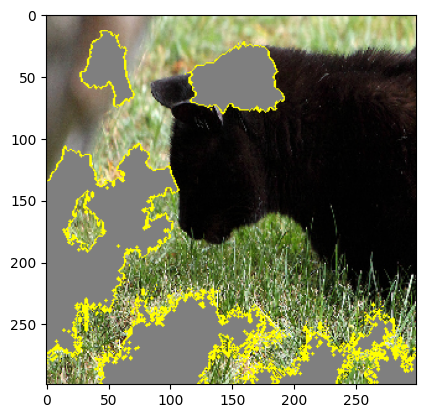

In [10]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=1000, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

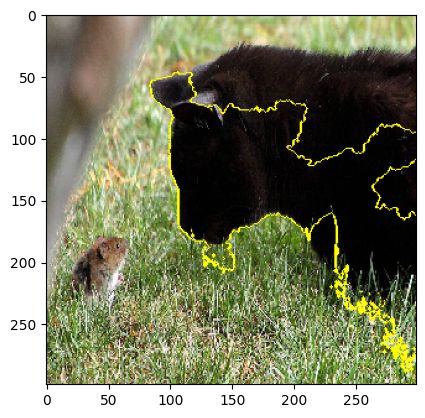

In [11]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

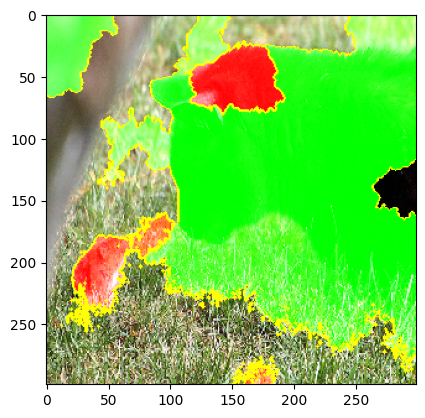

In [12]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=20, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

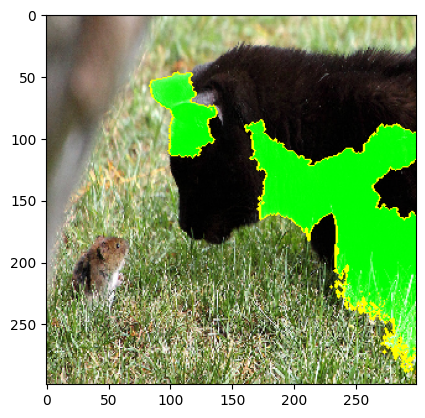

In [13]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

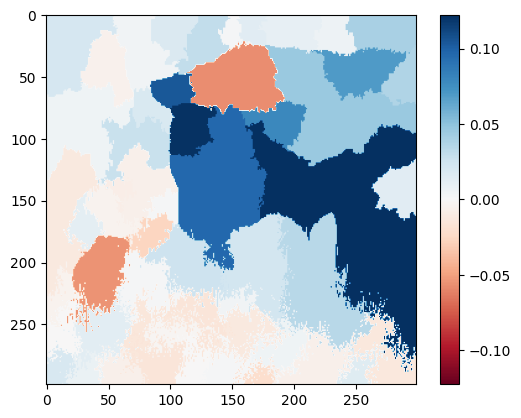

In [14]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

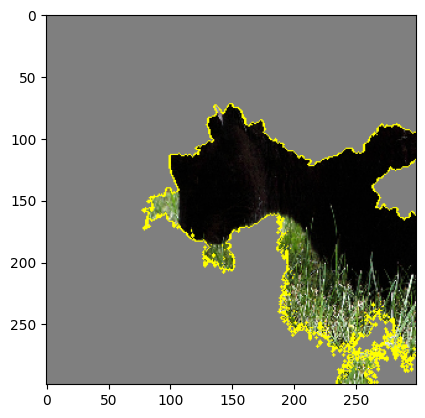

In [15]:
temp, mask = explanation.get_image_and_mask(106, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

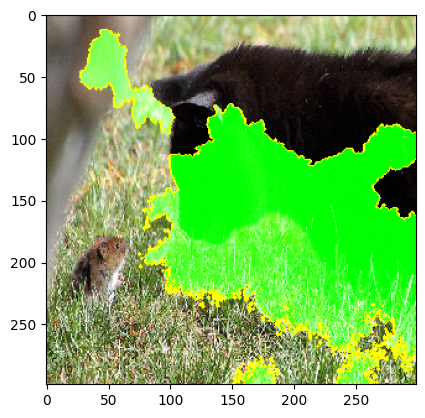

In [16]:
temp, mask = explanation.get_image_and_mask(106, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [17]:
segmented_image = explanation.segments
segmented_image

array([[ 8,  8,  8, ...,  2,  2,  2],
       [ 8,  8,  8, ...,  2,  2,  2],
       [ 8,  8,  8, ...,  2,  2,  2],
       ...,
       [47, 47, 47, ..., 42, 42, 42],
       [47, 47, 47, ..., 42, 42, 42],
       [47, 47, 47, ..., 42, 42, 42]])

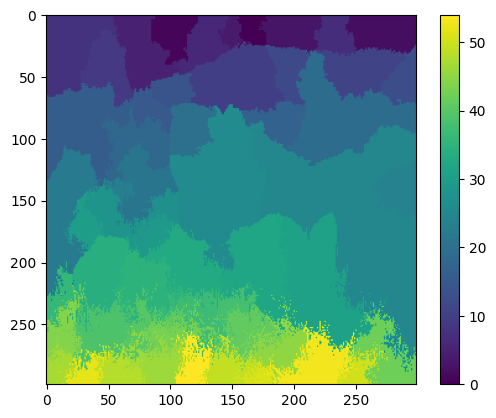

In [18]:
plt.imshow(explanation.segments)
plt.colorbar()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


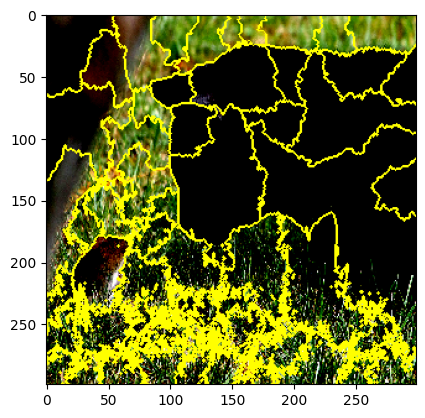

In [19]:
plt.imshow(mark_boundaries(images[0], explanation.segments))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


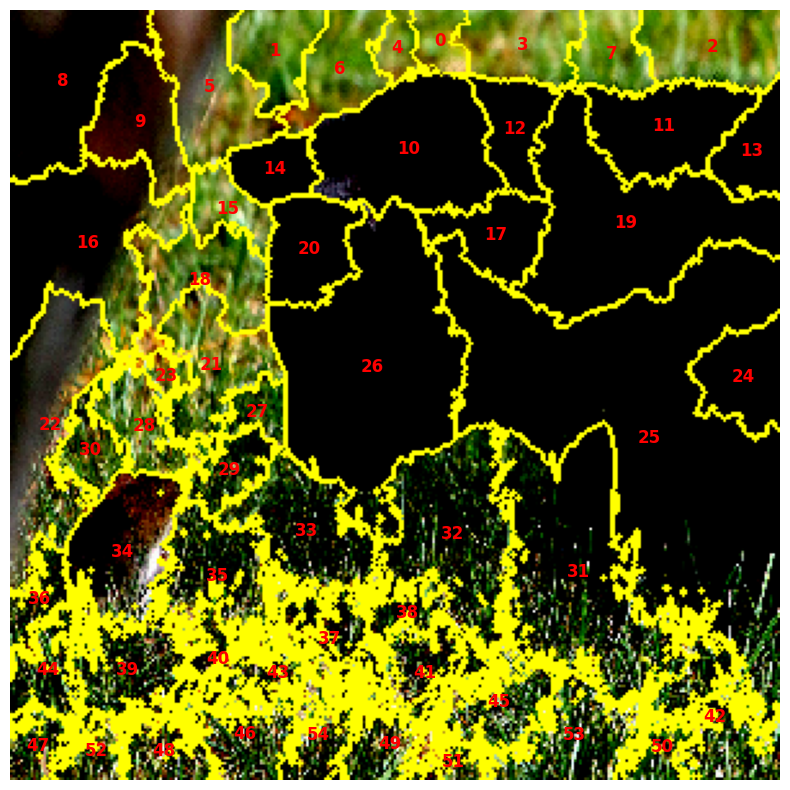

In [20]:
from scipy.ndimage import center_of_mass

segments = explanation.segments

boundary_marked_image = mark_boundaries(images[0], segments)

plt.figure(figsize=(10,10))
plt.imshow(boundary_marked_image)

unique_segments = np.unique(segments)
for seg_id in unique_segments:
    y, x = center_of_mass(segments == seg_id)
    plt.text(x, y, str(seg_id), color='red', fontsize=12, ha='center', va='center', weight='bold')

plt.axis('off')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


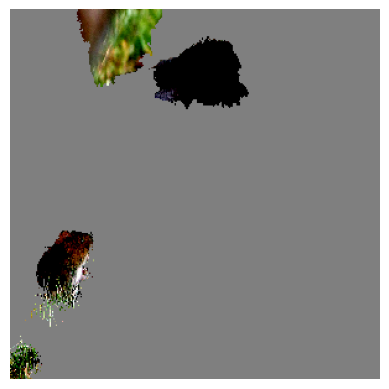

In [21]:
segments = explanation.segments

desired_superpixels = [1, 5, 10, 34, 47]

masked_image = np.ones(images[0].shape) * 0.5
for sp_id in desired_superpixels:
    masked_image[segments == sp_id] = images[0][segments == sp_id]

plt.imshow(masked_image)
plt.axis('off')
plt.show()

In [22]:
masked_image = masked_image.reshape((1, 299, 299, 3))

prediction = inet_model(masked_image)

print(prediction)

tf.Tensor(
[[8.35605024e-05 7.59394679e-05 1.42950870e-04 8.15115636e-05
  1.60036623e-04 1.14155424e-04 9.42790793e-05 1.76359154e-03
  2.94928160e-03 8.04864056e-03 1.40901480e-04 1.34021495e-04
  5.77331462e-04 2.15321532e-04 4.95127751e-05 4.22413286e-05
  1.79275183e-03 1.77315611e-04 2.02008188e-04 6.10922070e-05
  2.80380860e-04 1.77555985e-03 3.13755171e-03 1.47465440e-02
  1.26376969e-03 2.77927757e-05 1.42872723e-05 2.80655477e-05
  5.06673205e-05 9.46019645e-05 2.65822691e-05 2.42418013e-04
  4.89081285e-05 1.70751809e-04 5.39155917e-05 8.08754630e-05
  1.19603566e-04 1.04151644e-04 4.91234823e-05 3.71182570e-04
  4.47429229e-05 4.98147638e-05 1.14131850e-04 1.68885090e-04
  3.51486415e-05 4.73686778e-05 4.56187445e-05 3.32137643e-05
  9.25396234e-05 7.73476349e-05 5.51225639e-05 1.38880816e-04
  7.41784170e-05 5.73497346e-05 2.12426239e-05 1.14591174e-04
  4.46755148e-05 3.09566894e-05 4.81402822e-05 7.71819905e-05
  3.92769434e-05 2.24459272e-05 2.13618750e-05 8.86690104e-

In [23]:
predicted_class = np.argmax(prediction[0])
predicted_prob = prediction[0][predicted_class]
print(f"Predicted Class ID: {predicted_class}, Probability: {predicted_prob:.2%}")

Predicted Class ID: 380, Probability: 32.28%


In [24]:
import json
import requests

imagenet_classes_url = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"
response = requests.get(imagenet_classes_url)
imagenet_classes = json.loads(response.text)

label = imagenet_classes[str(predicted_class)][1]
print(f"Class ID {predicted_class} corresponds to: {label}")

Class ID 380 corresponds to: titi


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


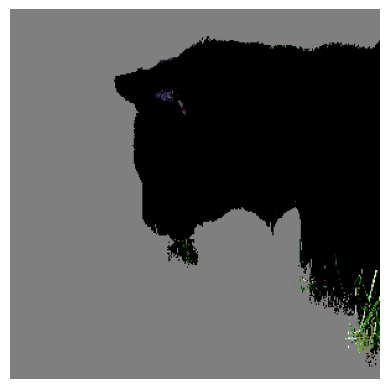

In [25]:
segments = explanation.segments

desired_superpixels = [10, 11, 12, 13, 14, 17, 19, 20, 24,25, 26]

masked_image = np.ones(images[0].shape) * 0.5
for sp_id in desired_superpixels:
    masked_image[segments == sp_id] = images[0][segments == sp_id]

plt.imshow(masked_image)
plt.axis('off')
plt.show()

In [26]:
masked_image = masked_image.reshape((1, 299, 299, 3))

prediction = inet_model(masked_image)

print(prediction)

tf.Tensor(
[[8.17777036e-05 1.84017030e-04 3.38378741e-04 7.80824048e-05
  2.40313369e-04 9.38746307e-05 1.09499982e-04 1.55430898e-04
  1.40748176e-04 6.97613723e-05 1.27897511e-04 1.19340206e-04
  1.23099831e-04 1.19677446e-04 1.26255298e-04 1.92260006e-04
  1.55851551e-04 1.51325265e-04 6.32146723e-04 1.20251658e-04
  7.11663306e-05 1.64977129e-04 9.58850287e-05 1.74983637e-04
  6.31783914e-05 1.19420467e-04 1.68541912e-04 7.10415625e-05
  1.55316666e-04 8.01704373e-05 1.88308826e-04 1.34409071e-04
  3.21064406e-04 7.47350423e-05 1.11526017e-04 2.68908538e-04
  1.66065540e-04 2.26306642e-04 3.87975160e-04 1.15609364e-04
  8.18238841e-05 1.77269452e-04 1.61042219e-04 4.82213763e-05
  1.01495520e-04 8.22881702e-05 1.46315462e-04 6.20031642e-05
  8.18982808e-05 7.38529416e-05 7.91730490e-05 1.07849024e-04
  2.64354487e-04 2.71388359e-04 2.71862431e-04 1.28975022e-04
  1.52662004e-04 1.22299316e-04 3.29120201e-04 2.77153420e-04
  2.78571941e-04 1.04878047e-04 1.14561226e-04 8.11460268e-

In [30]:
predicted_class = np.argmax(prediction[0])
predicted_prob = prediction[0][predicted_class]
print(f"Predicted Class ID: {predicted_class}, Probability: {predicted_prob:.2%}")

Predicted Class ID: 295, Probability: 67.31%


In [ ]:
import json
import requests

imagenet_classes_url = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"
response = requests.get(imagenet_classes_url)
imagenet_classes = json.loads(response.text)

label = imagenet_classes[str(predicted_class)][1]
print(f"Class ID {predicted_class} corresponds to: {label}")

In [ ]:
segments = explanation.segments

desired_superpixels = [1, 6, 4, 0, 3, 7, 2]

masked_image = np.ones(images[0].shape) * 0.5
for sp_id in desired_superpixels:
    masked_image[segments == sp_id] = images[0][segments == sp_id]

plt.imshow(masked_image)
plt.axis('off')
plt.show()

In [ ]:
masked_image = masked_image.reshape((1, 299, 299, 3))

prediction = inet_model(masked_image)

print(prediction)

In [ ]:
predicted_class = np.argmax(prediction[0])
predicted_prob = prediction[0][predicted_class]
print(f"Predicted Class ID: {predicted_class}, Probability: {predicted_prob:.2%}")

In [ ]:
import json
import requests

imagenet_classes_url = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"
response = requests.get(imagenet_classes_url)
imagenet_classes = json.loads(response.text)

label = imagenet_classes[str(predicted_class)][1]
print(f"Class ID {predicted_class} corresponds to: {label}")

In [ ]:
segments = explanation.segments

desired_superpixels = [34]

masked_image = np.ones(images[0].shape) * 0.5
for sp_id in desired_superpixels:
    masked_image[segments == sp_id] = images[0][segments == sp_id]

plt.imshow(masked_image)
plt.axis('off')
plt.show()

In [ ]:
masked_image = masked_image.reshape((1, 299, 299, 3))

prediction = inet_model(masked_image)

print(prediction)

In [ ]:
predicted_class = np.argmax(prediction[0])
predicted_prob = prediction[0][predicted_class]
print(f"Predicted Class ID: {predicted_class}, Probability: {predicted_prob:.2%}")

In [ ]:
import json
import requests

imagenet_classes_url = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"
response = requests.get(imagenet_classes_url)
imagenet_classes = json.loads(response.text)

label = imagenet_classes[str(predicted_class)][1]
print(f"Class ID {predicted_class} corresponds to: {label}")